<a href="https://colab.research.google.com/github/yukitiec/Research/blob/main/OpenPose_Opticalflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
import cv2 
import pandas as pd
import numpy as np
import glob
import os
import csv
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import scipy.ndimage as ndimage

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Offline Multi Tracking

##Load data from OpenPose

In [ ]:
#'/content/gdrive/My Drive/YAMAKAWA_LAB/pytorch-openpose/result/demo-video/body_pos

file = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_left_undistorted.csv',dtype=np.int32)
value =file.values
print(value.shape)

(287, 12)


In [ ]:
left_shoulder = []
left_elbow = []
left_wrist = []
right_shoulder = []
right_elbow = []
right_wrist = []
#0,1:right_shoulder, 2,3:right_elbow,4,5:right_wrist,6,7:left_shoulder,8,9:left_elbow,10,11:left_wrist
for i in range(value.shape[0]):
  temp_left_shoulder = []
  temp_left_elbow = []
  temp_left_wrist = []
  temp_right_shoulder = []
  temp_right_elbow = []
  temp_right_wrist = []
  for j in range(value[i].shape[0]):
    if j==0 or j==1:
      temp_right_shoulder.append(value[i][j])
    elif j==2 or j==3:
      temp_right_elbow.append(value[i][j])
    elif j == 4 or j==5:
      temp_right_wrist.append(value[i][j])  
    if j==6 or j==7:
      temp_left_shoulder.append(value[i][j])
    elif j==8 or j==9:
      temp_left_elbow.append(value[i][j])
    elif j == 10 or j==11:
      temp_left_wrist.append(value[i][j])  
  left_shoulder.append(temp_left_shoulder)
  left_elbow.append(temp_left_elbow)
  left_wrist.append(temp_left_wrist)
  right_shoulder.append(temp_right_shoulder)
  right_elbow.append(temp_right_elbow) 
  right_wrist.append(temp_right_wrist)
     

In [ ]:
print(type(right_wrist[0][1]))

<class 'numpy.int32'>


#Check the ROI

In [ ]:
from posixpath import ismount
from scipy.optimize._lsq.lsq_linear import in_bounds
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import statistics
import os
import glob

def show_roi(target):
  """show roi from YOLO

  target: ROI information from YOLO
  frame: frame index of each ROI for confirming duplication
  """
  w = 25
  h = 25
  #Source://///////////////////////
  src_img_dir= '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_right/undistorted_crop'#YOLO_labelimg/Images/13_files/rename'

  src_files=glob.glob("{}/*.png".format(src_img_dir))
  src_files.sort()
  #Save img  directory
  #dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/YOLO_labelimg/Images/13_files/optical_flow'#ObjectTracking/20221221/1/cam_1/ColorTracking-TemplateMatching'
  #if not os.path.exists(dst_img_dir):
  #  os.makedirs(dst_img_dir)

  for i,src in enumerate(src_files):
    #print("=== {} frame ===".format(i+1))
    img = cv2.imread(src)
    roi = target[i]
    if roi[0] == None:
      print("{} frames :: No detected".format(i+1))
      continue
    else:
      center_x = roi[0]
      center_y = roi[1]
      x_min = int(center_x - w/2)
      y_min = int(center_y - h/2)
      x_max = int(center_x + w/2)
      y_max = int(center_y + h/2)
      if i %10 == 0:
        print("======= {} ======".format(i))
        det = img[y_min:y_max,x_min:x_max]
        size = (100,100)
        det_resize = cv2.resize(det,size,interpolation = cv2.INTER_AREA)
        cv2_imshow(det_resize)

###left shoulder

======= 0 ======


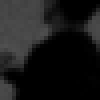

======= 10 ======


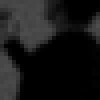

======= 20 ======


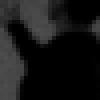

======= 30 ======


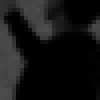

======= 40 ======


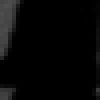

======= 50 ======


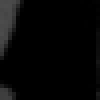

======= 60 ======


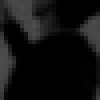

======= 70 ======


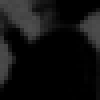

======= 80 ======


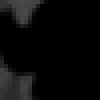

======= 90 ======


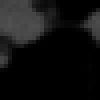

======= 100 ======


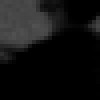

======= 110 ======


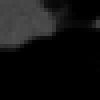

======= 120 ======


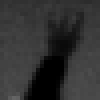

======= 130 ======


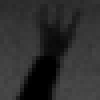

======= 140 ======


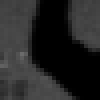

======= 150 ======


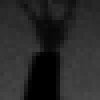

======= 160 ======


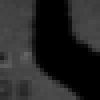

======= 170 ======


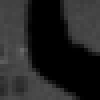

======= 180 ======


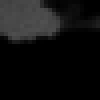

======= 190 ======


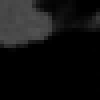

======= 200 ======


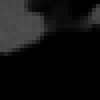

======= 210 ======


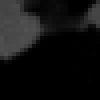

======= 220 ======


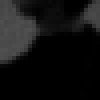

======= 230 ======


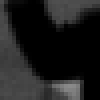

======= 240 ======


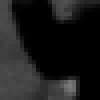

======= 250 ======


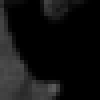

======= 260 ======


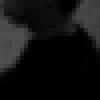

======= 270 ======


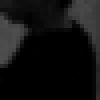

======= 280 ======


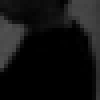

In [ ]:
show_roi(left_shoulder)

##left elbow

======= 0 ======


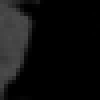

======= 10 ======


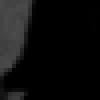

======= 20 ======


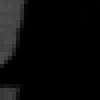

======= 30 ======


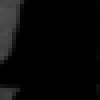

======= 40 ======


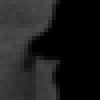

======= 50 ======


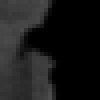

======= 60 ======


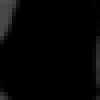

======= 70 ======


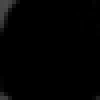

======= 80 ======


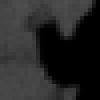

======= 90 ======


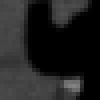

======= 100 ======


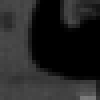

======= 110 ======


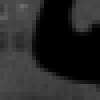

======= 120 ======


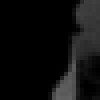

======= 130 ======


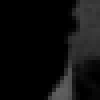

======= 140 ======


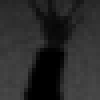

======= 150 ======


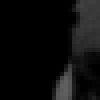

======= 160 ======


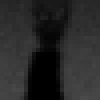

======= 170 ======


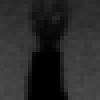

======= 180 ======


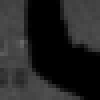

======= 190 ======


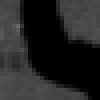

======= 200 ======


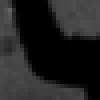

======= 210 ======


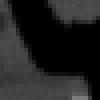

======= 220 ======


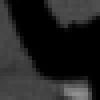

======= 230 ======


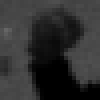

======= 240 ======


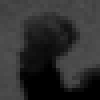

======= 250 ======


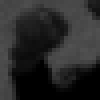

======= 260 ======


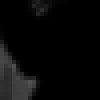

======= 270 ======


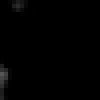

======= 280 ======


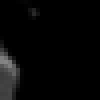

In [ ]:
show_roi(left_elbow)

##left wrist

======= 0 ======


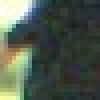

======= 10 ======


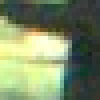

======= 20 ======


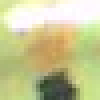

======= 30 ======


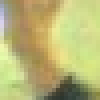

======= 40 ======


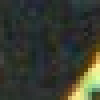

======= 50 ======


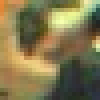

======= 60 ======


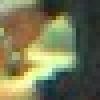

======= 70 ======


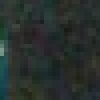

In [ ]:
show_roi(left_wrist)

##right shoulder

======= 0 ======


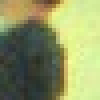

======= 10 ======


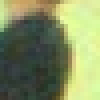

======= 20 ======


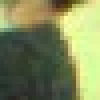

======= 30 ======


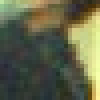

======= 40 ======


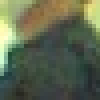

======= 50 ======


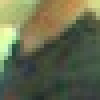

======= 60 ======


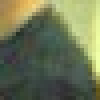

======= 70 ======


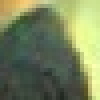

In [ ]:
show_roi(right_shoulder)

##right elbow

======= 0 ======


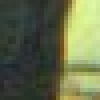

======= 10 ======


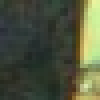

======= 20 ======


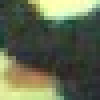

======= 30 ======


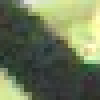

======= 40 ======


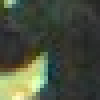

======= 50 ======


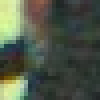

======= 60 ======


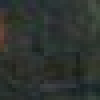

======= 70 ======


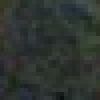

In [ ]:
show_roi(right_elbow)

##right wrist

======= 0 ======


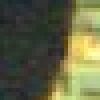

======= 10 ======


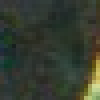

======= 20 ======


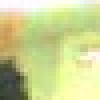

======= 30 ======


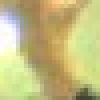

======= 40 ======


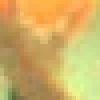

======= 50 ======


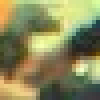

======= 60 ======


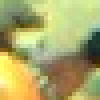

======= 70 ======


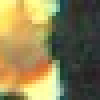

In [ ]:
show_roi(right_wrist)

#Optical Flow&OpenPose

In [ ]:
from tables.undoredo import move_from_shadow
def opticalflow(previous_search_area, current_search_area,p0,x_center_search,y_center_search,x_min_search,y_min_search,x_opticalflow,y_opticalflow,**lk_params):
  """optical flow tracking

  args:
    previous_search_area : previous cropped image
    current_search_area : current cropped image
    p0 : feature points' coordinate
    x_optical_flow : list for saving x-coordinates
    y_optical_flow : list for saving y-coordinate


  Return:
    previous_search_area : 
  """

  # calculate optical flow
  """ 
  @brief
  calcOpticalFlowPyrLK(previous image,current frame,position of previous image)
  Return ; 
  p1: next 2D points, if OPTFLOW_USE_INITIAL_FLOW, return all corresponding points
  st: if found, 1, else, 0
  err:
  """ 

  for p in p0:
    a,b = p.ravel()
    cv2.circle(current_search_area,(int(a),int(b)),2,(0,255,255),-1)
  #check data
  #print("----- current search area -------")
  #cv2_imshow(current_search_area)

  p1, st, err = cv2.calcOpticalFlowPyrLK(previous_search_area, current_search_area, p0, None, **lk_params) 

  # Select good points
  good_new = p1[st==1]
  good_old = p0[st==1]

  for p in good_new:
    a,b = p.ravel() #ravel():change from multi-dimensional array to 1-dimensional array
    cv2.circle(current_search_area,(int(a),int(b)),2,(0,255,255),-1)
  
  #check data
  #cv2_imshow(current_search_area)


  mov_x = []
  mov_y = []
  
  for i,(new,old) in enumerate(zip(good_new,good_old)):
      a,b = new.ravel() #new pos: (x,y)
      c,d = old.ravel() #previous pos: (x,y)

      mov_x.append(a-c)
      mov_y.append(b-d)
  
  #median
  mean_mov_x = statistics.median(mov_x)
  mean_mov_y = statistics.median(mov_y)

  print("movement X :{}".format(mov_x))
  print("movement Y :{}".format(mov_y))
  
  #Update center position
  x_center_search += mean_mov_x
  y_center_search += mean_mov_y
  x_center = x_min_search + x_center_search
  y_center = y_min_search+ mean_mov_y+ y_center_search
  x_opticalflow.append(x_center)
  y_opticalflow.append(y_center)

  # Now update the previous frame and previous points
  previous_search_area = current_search_area.copy()
  p0 = good_new 
  return previous_search_area, p0,x_center_search,y_center_search,x_opticalflow,y_opticalflow

def template(img,x,y,w,h,w_max,h_max,scale_x,scale_y,**feature_params):
  x_min_template = max(int(x-w/2),0)
  y_min_template = max(int(y-h/2),0)
  x_max_template = min(int(x+w/2),w_max)
  y_max_template = min(int(y+h/2),h_max)
  template = img[y_min_template:y_max_template,x_min_template:x_max_template]

  #Search Area
  x_min_search = max(int(x-scale_x*w),0)
  y_min_search = max(int(y-scale_y*h),0)
  x_max_search = min(int(x+scale_x*w),w_max)
  y_max_search = min(int(y+scale_y*h),h_max)
  previous_search_area = img[y_min_search:y_max_search,x_min_search:x_max_search]
  #cv2.rectangle(img,(x_min_search,y_min_search),(x_max_search,y_max_search),color=200,thickness=2)

  #return : feature points :shape(num_points,2)
  p0 = cv2.goodFeaturesToTrack(template, mask = None, **feature_params)
  
  #check feature points
  #translation from search coordinate to template coordinate
  x_st = abs(x_min_template - x_min_search)   
  y_st = abs(y_min_template - y_min_search)
  features = [] 
  for p in p0:
    temp = []
    a,b = p.ravel() #ravel():change from multi-dimensional array to 1-dimensional array
    a += x_st
    b += y_st 
    cv2.circle(previous_search_area,(int(a),int(b)),2,(0,255,255),-1)
    temp.append([a,b])
    features.append(temp)
  
  #check data
  #cv2.rectangle(previous_search_area,(int(x_st),int(y_st)),(int(x_st+w),int(y_st+h)),color=(100),thickness=2)
  #cv2_imshow(previous_search_area)
  
  #convet to nd.array in order to adjust to other form 
  features = np.array(features,np.float32)
  """
  optical flow based tracking : 
  1,images are grayscale
  2,parameters is floa32
  3,feature point coordinates(p0) should be (n,1,2)
  """
  return previous_search_area,p0,features,x_min_search,y_min_search,x_max_search,y_max_search

In [ ]:
import time
import glob
import os
import numpy as np
import cv2
import statistics

def Opticalflow_tracker(Ball:list,w:int,h:int,pos,scale_x:int,scale_y:int):
  """Offline Tracking System(YOLO + Template Matching)
  Args :
  Ball(list) : YOLO data
  margin_x,margin_y(int) : margin for ROI
  x_scale, y_scale(int) : scale in setting search area 

  return :
    tracker 
  """
  
  # Optical Flow
  #Feature Extraction Setting: Shi-Tomashi corner detection
  # params for Shi-Tomasi corner detection
  feature_params = dict( maxCorners =30,
                        qualityLevel = 0.05,
                        minDistance = 2,
                        blockSize = 2)
  
  #Setting for LK method
  # Parameters for lucas kanade optical flow
  lk_params = dict( winSize  = (3,3), #(3,3)
                    maxLevel = 3, #3
                    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)) #10,0.03
  
  x_opticalflow = []
  y_opticalflow = []
  #the num of detection by OpenPose
  num_detect = 0
  t = 0
  count = 0


  src_img_dir= '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_{}/undistorted_crop'.format(pos)#YOLO_labelimg/Images/13_files/rename'
  src_files=glob.glob("{}/*.png".format(src_img_dir))
  src_files.sort()

  dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_{}/undistorted_crop/openpose'.format(pos)#YOLO_labelimg/Images/13_files/Ball'#ObjectTracking/20221221/1/cam_1/ColorTracking-TemplateMatching'
  if not os.path.exists(dst_img_dir):
    os.makedirs(dst_img_dir)

  #initialization
  bbox = None

  #iteration
  for i,src in enumerate(src_files):
    count+=1
    print(i)
    print(bbox)
    dst_file = "{dir}/{index:03d}.png".format(dir=dst_img_dir,index=i)
    # grab the current frame, then handle if we are using a
    t1 = time.time()
    #read image as gray scale
    img = cv2.imread(src,0)
    w_max , h_max = img.shape
    #BBOX from YOLO
    if i %5 ==  0:
      x_center = Ball[i][0] 
      if x_center != None:  
        print('YOLO detected')
        num_detect += 1
        #get the center point
        x_center = Ball[i][0]
        y_center = Ball[i][1]
        x_opticalflow.append(x_center)
        y_opticalflow.append(y_center)
        previous_search_area,p0,features,x_min_search,y_min_search,x_max_search,y_max_search = template(img,x_center,y_center,w,h,w_max,h_max,scale_x,scale_y,**feature_params)

        #convert center position to search cordinate
        x_center_search = x_center - x_min_search
        y_center_search = y_center - y_min_search
        #next time step: change tracker
        t2 = time.time()
        t += (t2-t1)
        continue

      #can't get roi from YOLO  
      else:
        if num_detect>=1:
          print("Optical flow")
          #x,y,w,h : x_center,y_center, width, height
          #x,y,w,h = bbox
          
          current_search_area = img[y_min_search:y_max_search,x_min_search:x_max_search]

          previous_search_area, p0,x_center_search,y_center_search,x_opticalflow,y_opticalflow = opticalflow(previous_search_area, 
                                                                                                                current_search_area,features,x_center_search,y_center_search,
                                                                                                                x_min_search,y_min_search,
                                                                                                              x_opticalflow,y_opticalflow,**lk_params)
        else: #ROI not detected
          x_opticalflow.append(None)
          y_opticalflow.append(None)

    else:
      if num_detect == 0:
        x_opticalflow.append(None)
        y_opticalflow.append(None)
      else:
        print("Optical flow")
        #x,y,w,h : x_center,y_center, width, height
        #x,y,w,h = bbox
        
        current_search_area = img[y_min_search:y_max_search,x_min_search:x_max_search]
        
        previous_search_area, p0,x_center_search,y_center_search,x_opticalflow,y_opticalflow = opticalflow(previous_search_area, 
                                                                                                          current_search_area,features,x_center_search,
                                                                                                          y_center_search,x_min_search,y_min_search,
                                                                                                          x_opticalflow,y_opticalflow,**lk_params)
        
    t2 = time.time()
    t += (t2-t1)

  frequency = count/t
  print("process time;{:.4f}, speed: {:.1f}".format(t,frequency))
  #print(global_x[-1])
  #cv2.destroyAllWindows()
  #cap.release()
  return x_opticalflow, y_opticalflow

##RUN

In [ ]:
left_shoulder.append(temp_left_shoulder)
  left_elbow.append(temp_left_elbow)
  left_wrist.append(temp_left_wrist)
  right_shoulder.append(temp_right_shoulder)
  right_elbow.append(temp_right_elbow) 
  right_wrist.append(temp_right_wrist)
     

In [ ]:
x_opticalflow_LS, y_opticalflow_LS = Opticalflow_tracker(left_shoulder,w = 30,h = 30 ,pos="right",scale_x = 2,scale_y = 2)
x_opticalflow_LE, y_opticalflow_LE = Opticalflow_tracker(left_elbow,w = 30,h = 30 ,pos="right",scale_x = 2,scale_y = 2)
x_opticalflow_LW, y_opticalflow_LW = Opticalflow_tracker(left_wrist,w = 30,h = 30 ,pos="right",scale_x = 2,scale_y = 2)
x_opticalflow_RS, y_opticalflow_RS = Opticalflow_tracker(right_shoulder,w = 30,h = 30 ,pos="right",scale_x = 2,scale_y = 2)
x_opticalflow_RE, y_opticalflow_RE = Opticalflow_tracker(right_elbow,w = 30,h = 30 ,pos="right",scale_x = 2,scale_y = 2)
x_opticalflow_RH, y_opticalflow_RH = Opticalflow_tracker(right_wrist,w = 30,h = 30 ,pos="right",scale_x = 2,scale_y = 2)

Streaming output truncated to the last 5000 lines.
None
Optical flow
movement X :[-0.00035858154, 0.16493607, -1.9884453, 0.14113617, 4.0667877, 0.006664276, -0.03692627, 0.16646576, 0.055892944, 0.0010108948, -0.0116539, 2.2888184e-05, -0.00074768066, 0.048484802, 0.0027923584]
movement Y :[0.7760773, 0.115242004, -2.434105, 0.120269775, -4.9653854, -0.022972107, -0.13213348, 0.088279724, -0.0019264221, -0.0007247925, 0.005870819, -0.36696625, 0.092308044, 0.06668854, 0.0015945435]
62
None
Optical flow
movement X :[0.17588806, -1.9840393, 0.2002182, 7.5657578, 2.079895, -0.319767, 0.050231934, 0.9423294, 0.002445221, -0.66197586, 1.8624725, 0.04516983, 1.0114326, -0.0020446777]
movement Y :[0.05456543, -2.5178566, 0.097774506, -10.696316, 1.822197, -0.31046295, 0.06136322, -0.43864822, -0.04195404, -0.00951767, 1.1891785, 1.0103683, 0.9971237, -0.0020751953]
63
None
Optical flow
movement X :[0.053142548, -1.9769249, 0.0042686462, 0.111782074, -0.066207886, 0.2086525, 0.6624603, 0.0012

##Evaluation Data

In [ ]:
def evaluationPlot(left_shoulder,x_opticalflow,y_opticalflow):
  left_shoulder_np = np.array(left_shoulder)

  plt.figure(figsize=(8,8))
  plt.plot(x_opticalflow,label="opticalflow&openpose")
  plt.plot(left_shoulder_np[:,0],label="openpose")
  plt.legend(loc="best")
  plt.plot()
  plt.show()
  plt.figure(figsize=(8,8))
  plt.plot(y_opticalflow,label="opticalflow&openpose")
  plt.plot(left_shoulder_np[:,1],label="openpose")
  plt.legend(loc="best")
  plt.show()

###Right Camera

-- Left Shoulder --


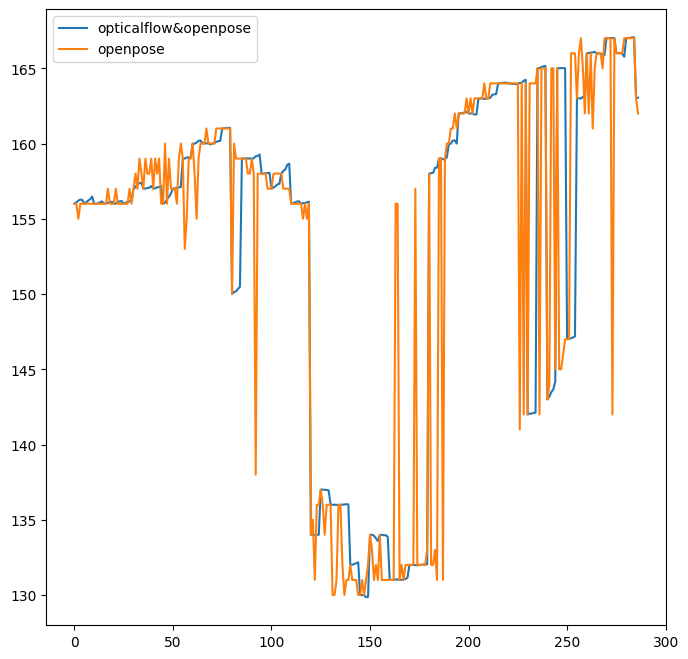

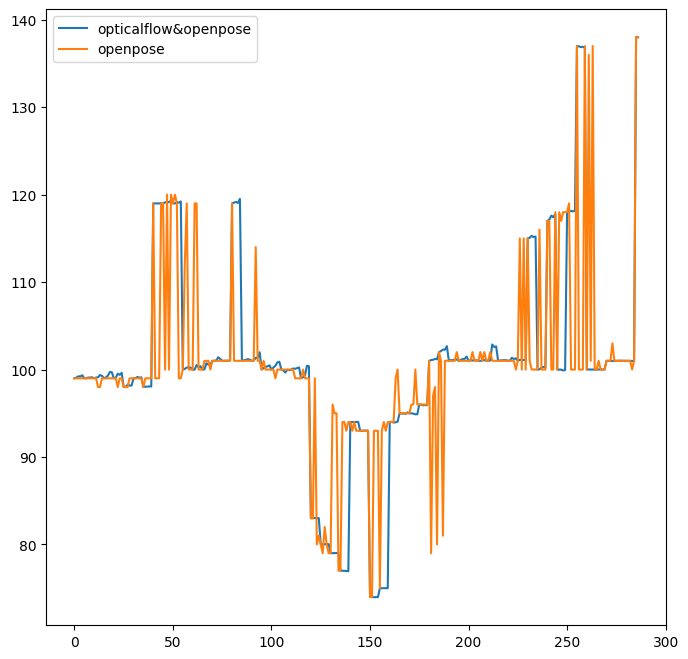

-- Left Elbow --


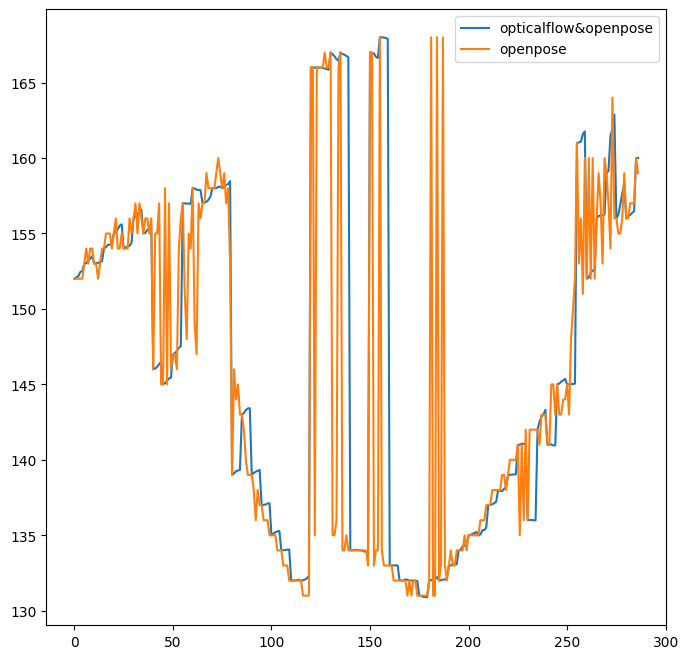

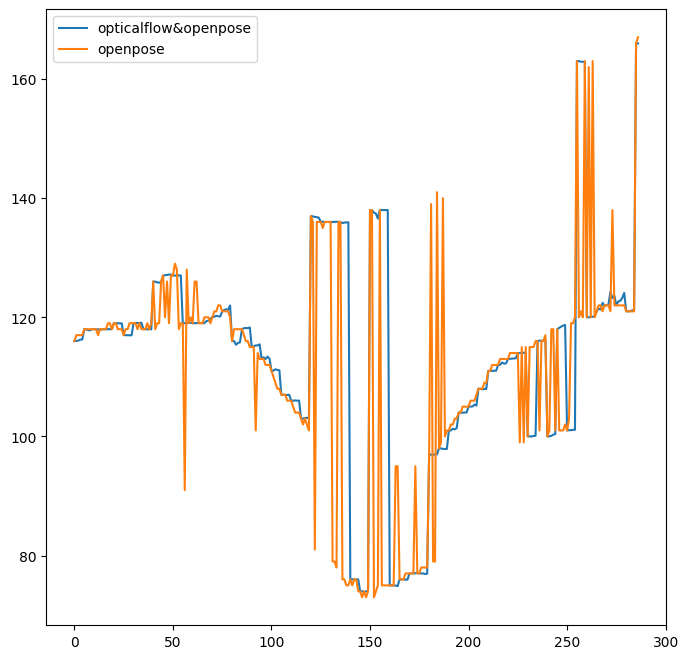

-- Left Hand --


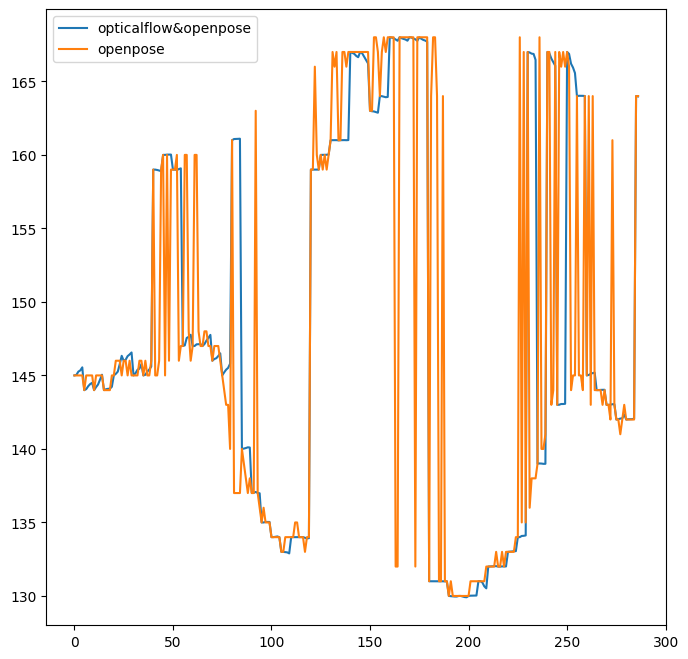

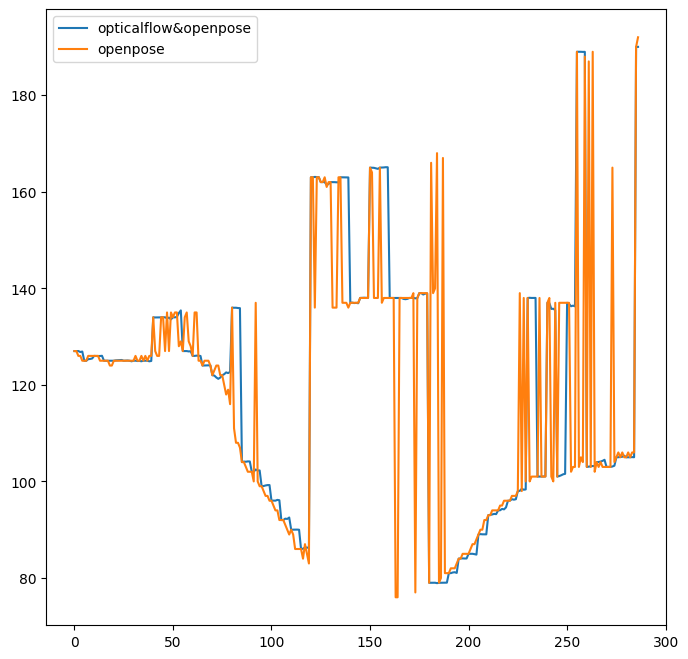

-- RIght Shoulder --


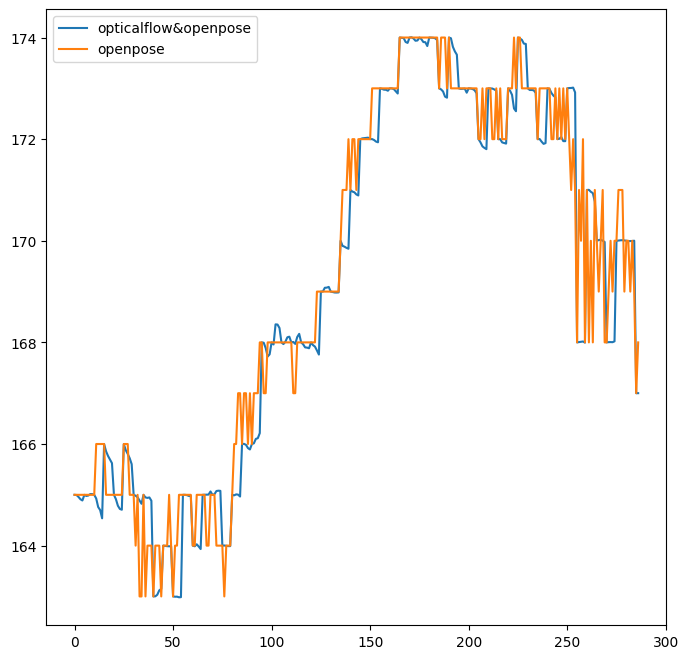

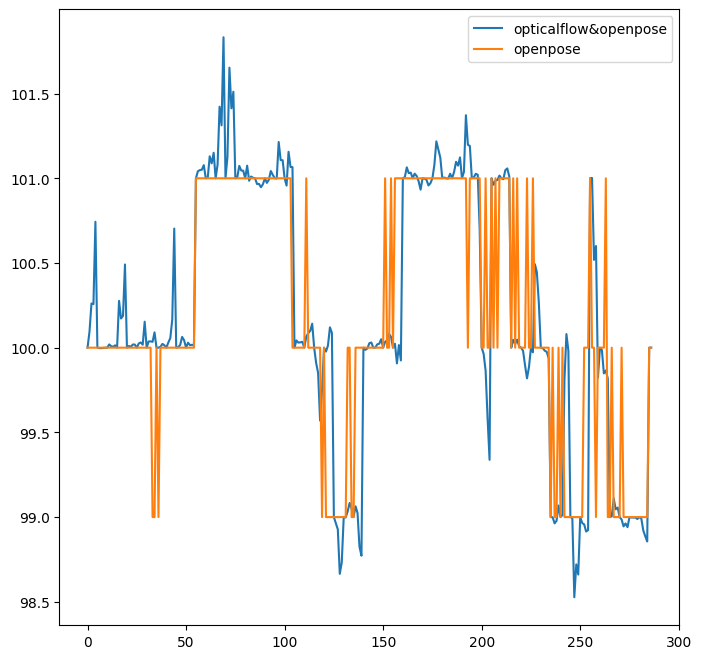

-- Right Elbowr --


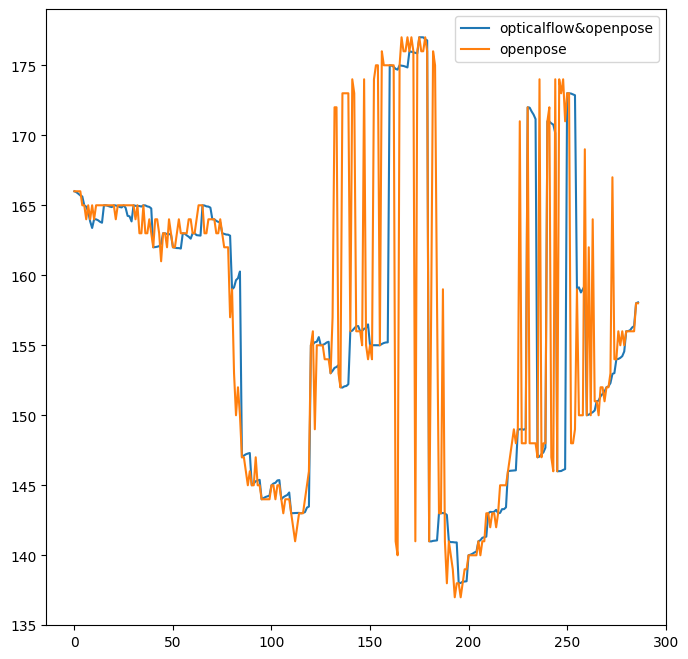

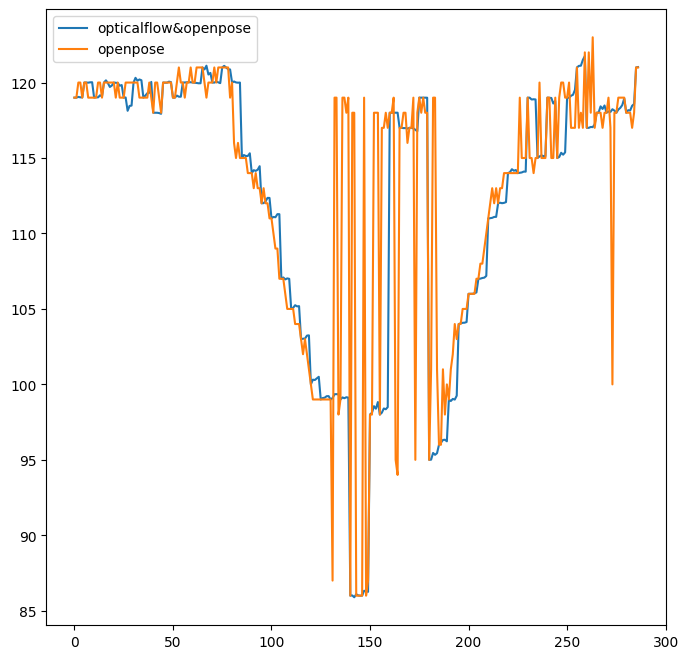

-- Right Hand --


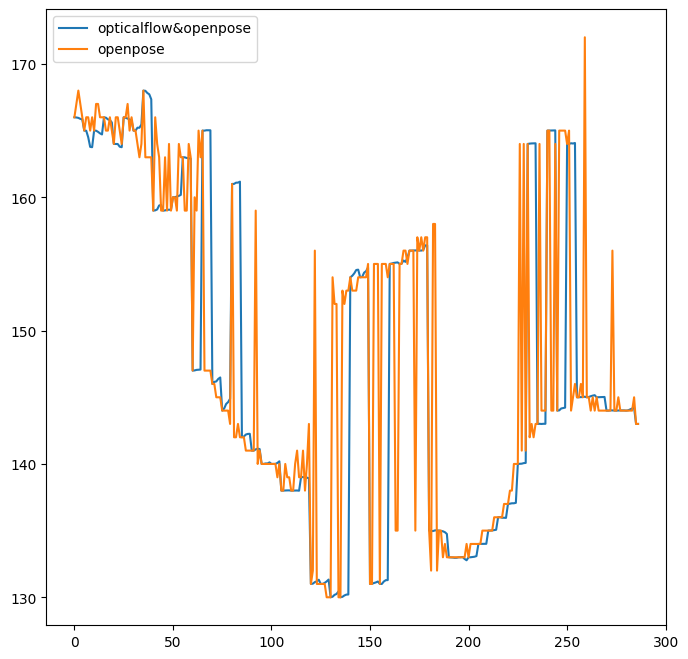

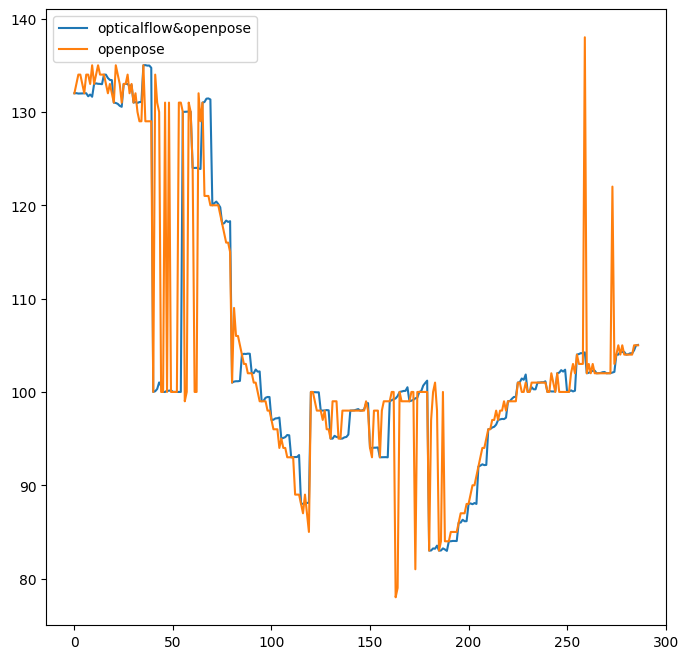

In [ ]:
print("-- Left Shoulder --")
evaluationPlot(left_shoulder,x_opticalflow_LS,y_opticalflow_LS)
print("-- Left Elbow --")
evaluationPlot(left_elbow,x_opticalflow_LE,y_opticalflow_LE)
print("-- Left Hand --")
evaluationPlot(left_wrist,x_opticalflow_LW,y_opticalflow_LW)
print("-- RIght Shoulder --")
evaluationPlot(right_shoulder,x_opticalflow_RS,y_opticalflow_RS)
print("-- Right Elbowr --")
evaluationPlot(right_elbow,x_opticalflow_RE,y_opticalflow_RE)
print("-- Right Hand --")
evaluationPlot(right_wrist,x_opticalflow_RH,y_opticalflow_RH)

###Left Camera

In [ ]:
print("-- Left Shoulder --")
evaluationPlot(left_shoulder,x_opticalflow_LS,y_opticalflow_LS)
print("-- Left Elbow --")
evaluationPlot(left_elbow,x_opticalflow_LE,y_opticalflow_LE)
print("-- Left Hand --")
evaluationPlot(left_wrist,x_opticalflow_LW,y_opticalflow_LW)
print("-- RIght Shoulder --")
evaluationPlot(right_shoulder,x_opticalflow_RS,y_opticalflow_RS)
print("-- Right Elbowr --")
evaluationPlot(right_elbow,x_opticalflow_RE,y_opticalflow_RE)
print("-- Right Hand --")
evaluationPlot(right_wrist,x_opticalflow_RH,y_opticalflow_RH)

##Write data into csv file

In [ ]:
import csv
def writecsv(x_opticalflow,y_opticalflow,cam,pos):
  #出力ファイル名
  filename='/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_{}/{}.csv'.format(cam,pos)

  #ファイルを作成
  with open(filename,"w") as f:
    writer = csv.writer(f)
    writer.writerow(["X","Y"])  
  
  for i in range(len(x_opticalflow)):
    with open(filename,"a",newline='') as f:
      writer = csv.writer(f)
      writer.writerow([x_opticalflow[i],y_opticalflow[i]])

In [ ]:
writecsv(x_opticalflow_RS,y_opticalflow_RS,cam = "right",pos="right_shoulder")
writecsv(x_opticalflow_RE,y_opticalflow_RE,cam = "right",pos="right_elbow")
writecsv(x_opticalflow_RH,y_opticalflow_RH,cam = "right",pos="right_hand")
writecsv(x_opticalflow_LS,y_opticalflow_LS,cam = "right",pos="left_shoulder")
writecsv(x_opticalflow_LE,y_opticalflow_LE,cam = "right",pos="left_elbow")
writecsv(x_opticalflow_LW,y_opticalflow_LW,cam = "right",pos="left_hand")

##Visualize data

In [ ]:
def readfile(cam,pos):
  file = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_{}/{}.csv'.format(cam,pos),dtype=np.float32)
  value =file.values
  x = value[:,0]
  y = value[:,1]
  return x,y

In [ ]:
x_opticalflow_LS, y_opticalflow_LS = readfile(cam="left",pos="shoulder")
x_opticalflow_LE, y_opticalflow_LE =  readfile(cam="left",pos="elbow")
x_opticalflow_LW, y_opticalflow_LW =  readfile(cam="left",pos="hand")
x_opticalflow_RS, y_opticalflow_RS =  readfile(cam="right",pos="shoulder")
x_opticalflow_RE, y_opticalflow_RE =  readfile(cam="right",pos="elbowr")
x_opticalflow_RH, y_opticalflow_RH =  readfile(cam="right",pos="hand")

FileNotFoundError: ignored

In [ ]:
def drawImage(x_opticalflow,y_opticalflow,cam,first=False):
  if first:
    src_img_dir= '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_{}/undistorted_crop'.format(cam)
    src_files=glob.glob("{}/*.png".format(src_img_dir))
  else:
    src_img_dir= '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_{}/undistorted_crop/draw'.format(cam)
    src_files=glob.glob("{}/*.jpg".format(src_img_dir))
  src_files.sort()

  dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_{}/undistorted_crop/draw'.format(cam)#'/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_{}/undistorted_crop/draw'.format(cam)#ObjectTracking/20221221/1/cam_1/ColorTracking-TemplateMatching'
  if not os.path.exists(dst_img_dir):
    os.makedirs(dst_img_dir)

  #initialization
  bbox = None

  #iteration
  for i,src in enumerate(src_files):
    print(i)
    img = cv2.imread(src)
    if x_opticalflow[i] :
      cv2.circle(img,(int(x_opticalflow[i]),int(y_opticalflow[i])),radius= 7,color=(255,255,255),thickness=-1)
      file_name = os.path.join(dst_img_dir,"{:03d}.jpg".format(i+1))
      cv2.imwrite(file_name,img)
    else:
      break

In [ ]:
drawImage(x_opticalflow_RS,y_opticalflow_RS,cam = "right",first=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
drawImage(x_opticalflow_RE,y_opticalflow_RE,cam = "right")
drawImage(x_opticalflow_RH,y_opticalflow_RH,cam = "right")
drawImage(x_opticalflow_LS,y_opticalflow_LS,cam = "right")
drawImage(x_opticalflow_LE,y_opticalflow_LE,cam = "right")
drawImage(x_opticalflow_LW,y_opticalflow_LW,cam = "right")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

#Making Video

In [ ]:
#処理後の画像を動画に変換する
import glob

dst_img_dir = '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_right/undistorted_crop/draw'#'/content/gdrive/My Drive/YAMAKAWA_LAB/MultiTracking/video'#'/content/gdrive/My Drive/YAMAKAWA_LAB/pytorch-openpose/result/demo-video'
src_img_dir=dst_img_dir

#フォルダに存在するファイルを取得する、0001.jpg~0005.jpg→{}/*.jpg
src_files=glob.glob("{}/*.jpg".format(src_img_dir))
src_files.sort()

#処理後の画像から動画を作る
!ffmpeg -framerate 30 -i "$src_img_dir/%03d.jpg" '/content/gdrive/My Drive/YAMAKAWA_LAB/3D_Reconstruction/20230425/Tracking/tracking_right_openpose_2.mp4' 

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e